# Rough

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge")),])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

ValueError: x and y must be the same size

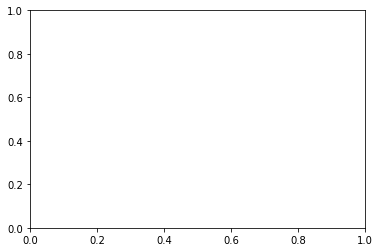

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,svm_clf.predict(X))


# Rough

print(__doc__)

h = .02  # step size in the mesh

## we create an instance of SVM and fit out data. We do not scale our
## data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

## create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

## title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    ## Plot the decision boundary. For that, we will assign a color to each
    ## point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ## Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Main work

# Support Vector Regression (SVR)

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [14]:
y = y.reshape(len(y),1)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR model

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

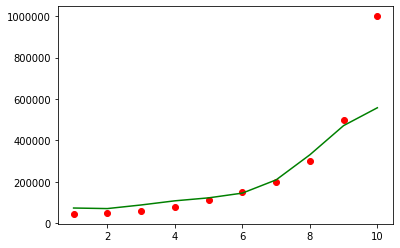

In [24]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color = 'green')
plt.show()

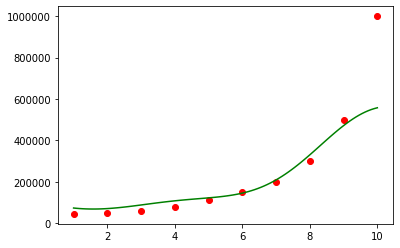

In [27]:
X_grid = np.linspace(min(X),max(X),100)
X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X_grid),sc_y.inverse_transform(regressor.predict(X_grid)),color = 'green')
plt.show()

In [40]:
# Prediction

sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.8]])))

array([302709.97935649])